In [1]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
experiencia = pd.Series([1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7,3.9,4.0,4.0,4.1,4.5,4.9,5.1,5.3,5.9,6.0,6.8,7.1,7.9,8.2,8.7,9.0,9.5,9.6,10.3,10.5])
salario = pd.Series([39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 60150.00, 54445.00, 64445.00, 57189.00, 63218.00, 55794.00, 56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00, 81363.00, 93940.00, 91738.00, 98273.00, 101302.00, 113812.00, 109431.00, 105582.00, 116969.00, 112635.00, 122391.00, 121872.00])
df=pd.DataFrame({'Experiencia':experiencia,'Salario':salario})
df

,Experiencia,Salario
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [2]:
salario.isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

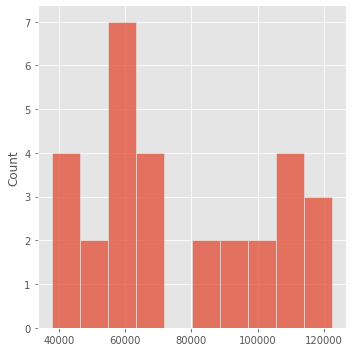

In [3]:
sns.displot(salario, bins=10)
plt.show()

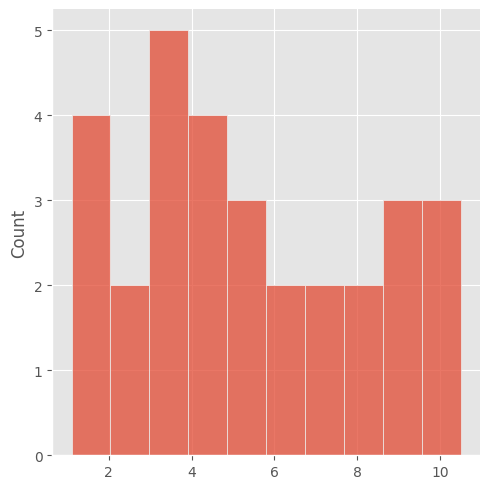

In [4]:
sns.displot(experiencia, bins=10)
plt.show()

In [5]:
correlacion_matrix_salary = np.corrcoef(salario, experiencia)
correlacion_matrix_salary

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

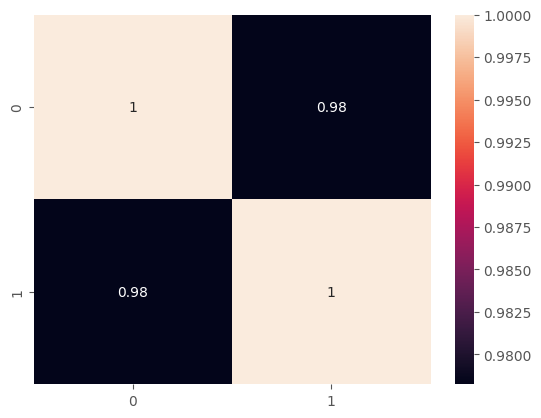

In [6]:
sns.heatmap(data=correlacion_matrix_salary, annot=True)
plt.show()

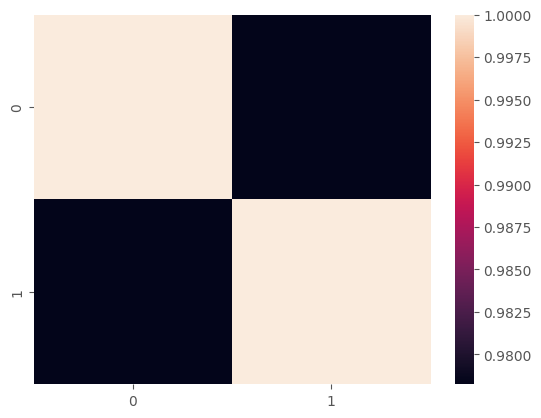

In [7]:
sns.heatmap(data=correlacion_matrix_salary, annot=False)
plt.show()

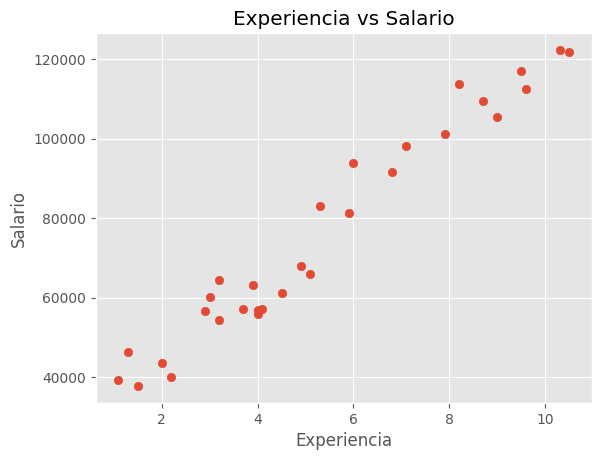

In [8]:
plt.scatter(experiencia, salario)
plt.title('Experiencia vs Salario')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

In [9]:
print("Maximo valor {}".format(salario.max()))
print("Minimo valor {}".format(salario.min()))
print("Mean valor {}".format(salario.mean()))
print("Median valor {}".format(salario.median()))
print("STD valor {}".format(salario.std()))

Maximo valor 122391.0
Minimo valor 37731.0
Mean valor 76003.0
Median valor 65237.0
STD valor 27414.4297845823


In [10]:
print("Maximo valor {}".format(experiencia.max()))
print("Minimo valor {}".format(experiencia.min()))
print("Mean valor {}".format(experiencia.mean()))
print("Median valor {}".format(experiencia.median()))
print("STD valor {}".format(experiencia.std()))

Maximo valor 10.5
Minimo valor 1.1
Mean valor 5.3133333333333335
Median valor 4.7
STD valor 2.8378881576627184


In [11]:
x_experiencia = experiencia
y_salario = salario

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_experiencia, y_salario, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24,)
(6,)
(24,)
(6,)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# x_train=x_train.values.reshape(-1,1)
lin_model=LinearRegression()
lin_model.fit(x_train, y_train)
lin_model

LinearRegression()

In [15]:
from sklearn.metrics import r2_score
# x_test=x_test.values.reshape(-1,1)
y_test_predict=lin_model.predict(x_test)
r2=r2_score(y_test,y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('R2 score {}'.format(r2))

The model performance for testing set
--------------------------------------
R2 score 0.9024461774180497


In [17]:
#experiencia=experiencia.values.reshape(-1,1)
predicted_data_salario=lin_model.predict(experiencia)
predicted_data_salario[0:5]

array([35687.77986711, 37572.54293172, 39457.30599632, 44169.21365784,
       46053.97672244])

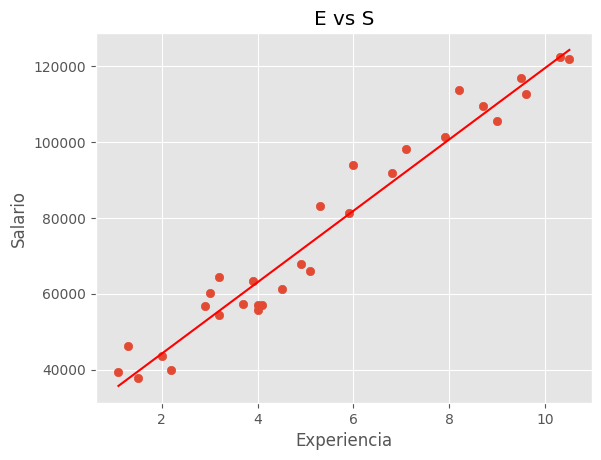

In [18]:
plt.scatter(experiencia,salario)
plt.plot(experiencia,predicted_data_salario, color='red')
plt.title('E vs S')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

In [ ]:
df1 = pd.DataFrame({'Real':salario,'Predicción':predicted_data_salario})
df1

In [ ]:
df1.head(30).plot(kind='bar')
plt.show()